# ЛР 1 (В8)
## Основные понятия математической статистики. Вариационный ряд. Эмпирическая функция распределения.

In [1]:
from random import uniform
from tabulate import tabulate
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# 1

In [2]:
def Y(x):
    return 2 / (2 + x)

a = -1
b = 5
y0 = 1
n = 10

In [3]:
X = sorted(round(uniform(0, 1) * (b - a) + a, 3) for _ in range(n))
X

[-0.273, 0.95, 1.153, 1.157, 1.643, 2.074, 3.169, 3.413, 3.84, 4.049]

In [4]:
y_list = sorted([round(Y(X[i]), 3) for i in range(n)])

# 2

Вариационный ряд

In [5]:
y_list

[0.331, 0.342, 0.369, 0.387, 0.491, 0.549, 0.634, 0.634, 0.678, 1.158]

Эмпирическая функция распределения

In [6]:
counts = dict(Counter(y_list))
freq = [round(i / n, 3) for i in counts.values()]
ys = [0]
for k, i in enumerate(counts.values()):
    ys.append(ys[k] + i)
star_f = [round(i / n, 3) for i in ys]
star_f

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0]

Таблица и график

In [7]:
x_list = sorted(list(set(y_list[:])))

table = [list(item) for item in zip(x_list, counts.values(), freq, ys[1:], star_f[1:])]
print(tabulate(table, headers=['Значение', 'Количество вариант', 'Частота',
                               'Накопленное количество вариант', 'Накопленная частота'], tablefmt='fancy_grid'))

╒════════════╤══════════════════════╤═══════════╤══════════════════════════════════╤═══════════════════════╕
│   Значение │   Количество вариант │   Частота │   Накопленное количество вариант │   Накопленная частота │
╞════════════╪══════════════════════╪═══════════╪══════════════════════════════════╪═══════════════════════╡
│      0.331 │                    1 │       0.1 │                                1 │                   0.1 │
├────────────┼──────────────────────┼───────────┼──────────────────────────────────┼───────────────────────┤
│      0.342 │                    1 │       0.1 │                                2 │                   0.2 │
├────────────┼──────────────────────┼───────────┼──────────────────────────────────┼───────────────────────┤
│      0.369 │                    1 │       0.1 │                                3 │                   0.3 │
├────────────┼──────────────────────┼───────────┼──────────────────────────────────┼───────────────────────┤
│      0.387 │     

In [8]:
x_list.insert(0, -float('inf'))
x_list.append(float('inf'))
x_interval = [(x_list[i], x_list[i+1]) for i in range(len(x_list) - 1)]
table = [list(item) for item in zip(x_interval, star_f)]
print(tabulate(table, headers=['Промежуток', 'Значение функции'], tablefmt='fancy_grid'))

╒════════════════╤════════════════════╕
│ Промежуток     │   Значение функции │
╞════════════════╪════════════════════╡
│ (-inf, 0.331)  │                0   │
├────────────────┼────────────────────┤
│ (0.331, 0.342) │                0.1 │
├────────────────┼────────────────────┤
│ (0.342, 0.369) │                0.2 │
├────────────────┼────────────────────┤
│ (0.369, 0.387) │                0.3 │
├────────────────┼────────────────────┤
│ (0.387, 0.491) │                0.4 │
├────────────────┼────────────────────┤
│ (0.491, 0.549) │                0.5 │
├────────────────┼────────────────────┤
│ (0.549, 0.634) │                0.6 │
├────────────────┼────────────────────┤
│ (0.634, 0.678) │                0.8 │
├────────────────┼────────────────────┤
│ (0.678, 1.158) │                0.9 │
├────────────────┼────────────────────┤
│ (1.158, inf)   │                1   │
╘════════════════╧════════════════════╛


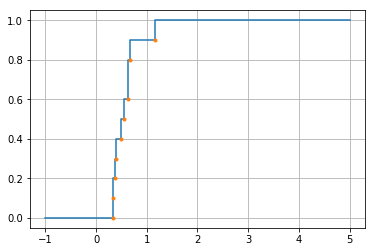

In [9]:
x_plot = x_list[1:-1]
y_plot = star_f[:]
x_plot.insert(0, a)
x_plot.append(b)
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
plt.grid(True)
plt.show()

# 3

Теоритическая функция распределения

In [10]:
def G(y):
    if y < 2 / 7:
        return 0
    elif y > 2:
        return 1
    else:
        return 1 / 3 * (-(1 / y) + 3.5)

График теоритической функции расределения

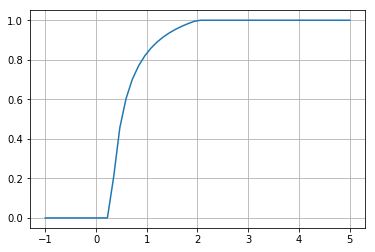

In [11]:
x_lin = np.linspace(min(x_plot), max(x_plot), 50)
plt.plot(x_lin, list(map(G, x_lin)))
plt.grid(True)
plt.show()

График эмпирической и теоретической функции

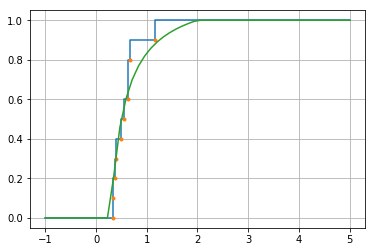

In [12]:
plt.step(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
plt.plot(x_lin, list(map(G, x_lin)))
plt.grid(True)
plt.show()